# ML Pre Assignment 2 (Clustering) - Flood Risk Analysis
**Student Index:** 214179A  
**Dataset:** Sri Lanka Flood Risk Dataset

This notebook implements clustering analysis using K-Means, DBSCAN, and Gaussian Mixture Model (GMM) algorithms on the flood risk dataset.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

filepath = "/sri_lanka_flood_risk_dataset.csv"
features = [
    "flood_risk_score",
    "rainfall_7d_mm",
    "distance_to_river_m",
    "elevation_m",
    "population_density_per_km2",
    "historical_flood_count",
    "nearest_evac_km"
]

df = pd.read_csv(filepath)
print("Dataset Shape:", df.shape)
print("\nFirst few rows:")
df[features].head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dataset Shape: (25000, 32)

First few rows:


,flood_risk_score,rainfall_7d_mm,distance_to_river_m,elevation_m,population_density_per_km2,historical_flood_count,nearest_evac_km
0,39.56,140.8,339.2,88,906,0,2.74
1,30.64,126.6,1257.6,58,439,0,8.45
2,35.60,155.1,5225.3,80,136,0,3.01
3,17.44,10.1,2950.4,111,729,0,4.94
4,61.92,36.1,228.3,26,431,1,4.65


In [ ]:
print("Dataset Info:")
df[features].info()

print("\nDataset Statistics:")
df[features].describe()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   flood_risk_score            25000 non-null  float64
 1   rainfall_7d_mm              25000 non-null  float64
 2   distance_to_river_m         25000 non-null  float64
 3   elevation_m                 25000 non-null  int64  
 4   population_density_per_km2  25000 non-null  int64  
 5   historical_flood_count      25000 non-null  int64  
 6   nearest_evac_km             25000 non-null  float64
dtypes: float64(4), int64(3)
memory usage: 1.3 MB

Dataset Statistics:


,flood_risk_score,rainfall_7d_mm,distance_to_river_m,elevation_m,population_density_per_km2,historical_flood_count,nearest_evac_km
count,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,33.265946,80.386532,2013.472684,187.514480,625.340320,0.201000,6.021932
std,14.783238,58.434452,2007.170691,323.405463,504.674553,0.505697,6.045651
min,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000
25%,22.547500,33.075000,582.975000,31.000000,286.750000,0.000000,1.740000
50%,32.300000,69.500000,1394.200000,68.000000,519.000000,0.000000,4.170000
75%,42.940000,116.600000,2783.400000,124.000000,796.000000,0.000000,8.350000
max,100.000000,372.200000,16802.000000,2148.000000,3113.000000,5.000000,55.950000


In [ ]:
# Data Preprocessing
# Select only the features we want to use
df_cluster = df[features].copy()

# Check for missing values
print("Missing values:")
print(df_cluster.isnull().sum())

# Drop rows with missing values (or fill if preferred, but dropping is safer for large datasets with few NaNs)
df_cluster = df_cluster.dropna()
print(f"\nShape after handling missing values: {df_cluster.shape}")

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cluster)

print("\nScaled data shape:", X_scaled.shape)

Missing values:
flood_risk_score              0
rainfall_7d_mm                0
distance_to_river_m           0
elevation_m                   0
population_density_per_km2    0
historical_flood_count        0
nearest_evac_km               0
dtype: int64

Shape after handling missing values: (25000, 7)

Scaled data shape: (25000, 7)


In [ ]:
# ================================================================
# 1. K-Means Clustering
# ================================================================

print("1. K-Means Clustering")

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_scaled)

print(f"Number of clusters: {len(np.unique(kmeans_labels))}")
print(f"Cluster sizes: {np.bincount(kmeans_labels)}")

1. K-Means Clustering
Number of clusters: 3
Cluster sizes: [13358  2965  8677]


In [ ]:
# ================================================================
# 2. DBSCAN Clustering
# ================================================================

print("2. DBSCAN Clustering")

# For large datasets, increase min_samples slightly
dbscan = DBSCAN(eps=1.5, min_samples=4)
dbscan_labels = dbscan.fit_predict(X_scaled)

n_clusters_dbscan = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
n_noise = list(dbscan_labels).count(-1)

print(f"Number of clusters: {n_clusters_dbscan}")
print(f"Number of noise points: {n_noise}")
if n_clusters_dbscan > 0:
    print(f"Cluster sizes: {np.bincount(dbscan_labels[dbscan_labels >= 0])}")
else:
    print("All points classified as noise.")

2. DBSCAN Clustering
Number of clusters: 5
Number of noise points: 226
Cluster sizes: [20866  3162   630   103    13]


In [ ]:
# ================================================================
# 3. Gaussian Mixture Model (GMM)
# ================================================================

print("3. Gaussian Mixture Model (GMM)")

gmm = GaussianMixture(n_components=3, random_state=42)
gmm_labels = gmm.fit_predict(X_scaled)

print(f"Number of components: {len(np.unique(gmm_labels))}")
print(f"Cluster sizes: {np.bincount(gmm_labels)}")

3. Gaussian Mixture Model (GMM)
Number of components: 3
Cluster sizes: [ 3429 17716  3855]


In [ ]:
# ================================================================
# 4. Comparison using Silhouette Score
# ================================================================

print("4. Comparison using Silhouette Score")

# Calculate silhouette scores
sample_size = 10000 if len(X_scaled) > 10000 else None

sil_score_kmeans = silhouette_score(X_scaled, kmeans_labels, sample_size=sample_size)
sil_score_gmm = silhouette_score(X_scaled, gmm_labels, sample_size=sample_size)

if n_clusters_dbscan >= 2 and n_noise < len(dbscan_labels) * 0.9:
    sil_score_dbscan = silhouette_score(X_scaled, dbscan_labels, sample_size=sample_size)
else:
    sil_score_dbscan = -1  # Invalid score

print(f"K-Means Silhouette Score: {sil_score_kmeans:.4f}")
print(f"DBSCAN Silhouette Score: {sil_score_dbscan:.4f}" if sil_score_dbscan != -1 else "DBSCAN Silhouette Score: N/A (too many noise points)")
print(f"GMM Silhouette Score: {sil_score_gmm:.4f}")

# Create comparison dataframe
comparison_scores = pd.DataFrame({
    'Algorithm': ['K-Means', 'DBSCAN', 'GMM'],
    'Silhouette Score': [sil_score_kmeans, sil_score_dbscan if sil_score_dbscan != -1 else np.nan, sil_score_gmm]
})
print("\nComparison Table:")
print(comparison_scores)

4. Comparison using Silhouette Score
K-Means Silhouette Score: 0.1857
DBSCAN Silhouette Score: 0.1615
GMM Silhouette Score: 0.2294

Comparison Table:
  Algorithm  Silhouette Score
0   K-Means          0.185723
1    DBSCAN          0.161467
2       GMM          0.229443


5. Visualization using PCA
Explained variance ratio: [0.22034245 0.1569852 ]
Total explained variance: 0.3773


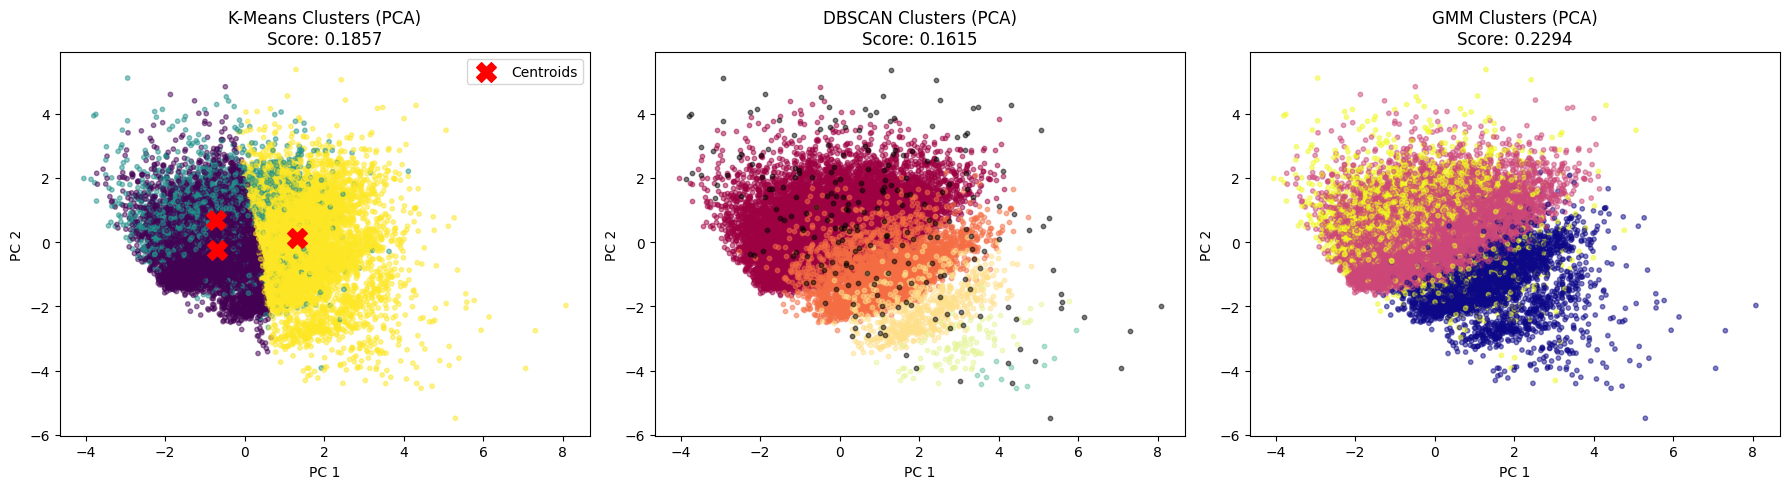

In [ ]:
# ================================================================
# 5. Visualization using PCA
# ================================================================

print("5. Visualization using PCA")


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print(f"Explained variance ratio: {pca.explained_variance_ratio_}")
print(f"Total explained variance: {sum(pca.explained_variance_ratio_):.4f}")

plt.figure(figsize=(18, 5))

# Plot K-Means clusters
plt.subplot(1, 3, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis', alpha=0.5, s=10)
centers_pca = pca.transform(kmeans.cluster_centers_)
plt.scatter(centers_pca[:, 0], centers_pca[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title(f'K-Means Clusters (PCA)\nScore: {sil_score_kmeans:.4f}')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend()

# Plot DBSCAN clusters
plt.subplot(1, 3, 2)
unique_labels = set(dbscan_labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = 'black'
    class_member_mask = (dbscan_labels == k)
    xy = X_pca[class_member_mask]
    plt.scatter(xy[:, 0], xy[:, 1], c=[col], label=f'C {k}' if k != -1 else 'Noise', alpha=0.5, s=10)
plt.title(f'DBSCAN Clusters (PCA)\nScore: {sil_score_dbscan:.4f}' if sil_score_dbscan != -1 else 'DBSCAN (Invalid Score)')
plt.xlabel('PC 1')
plt.ylabel('PC 2')

# Plot GMM clusters
plt.subplot(1, 3, 3)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=gmm_labels, cmap='plasma', alpha=0.5, s=10)
plt.title(f'GMM Clusters (PCA)\nScore: {sil_score_gmm:.4f}')
plt.xlabel('PC 1')
plt.ylabel('PC 2')

plt.tight_layout()
plt.savefig('clustering_comparison_pca.png', dpi=300, bbox_inches='tight')
plt.show()

6. Visualization using t-SNE (Sampled)


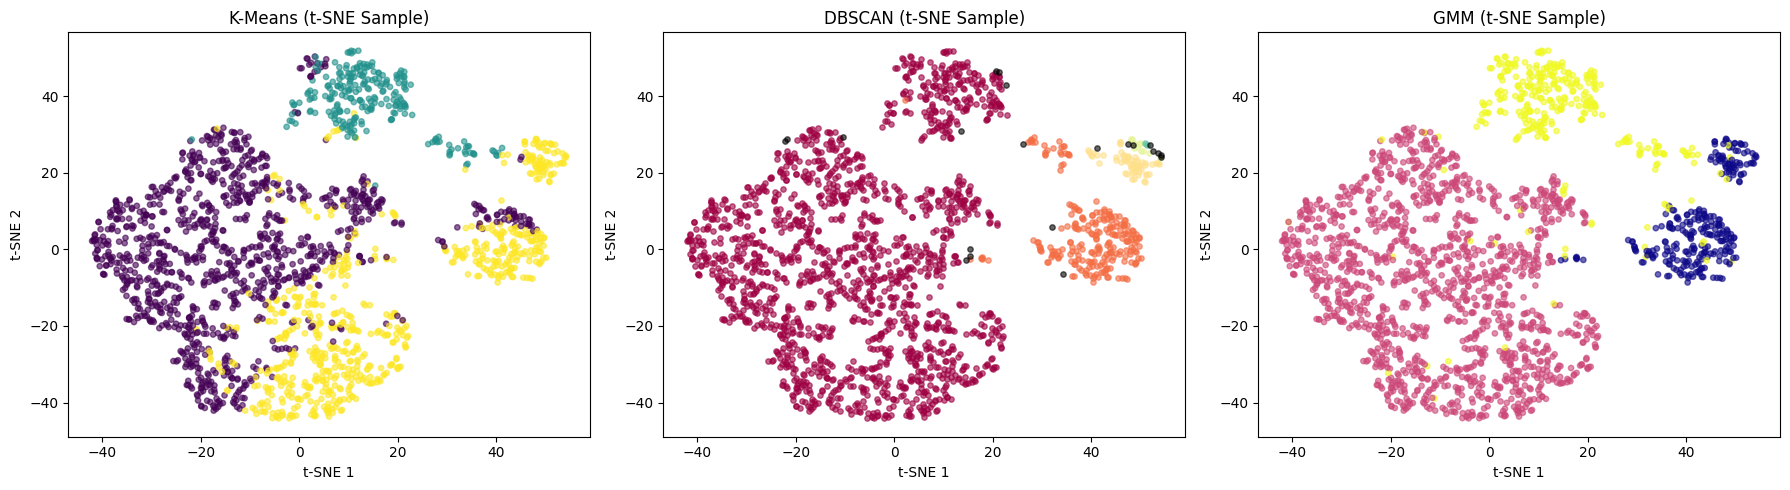

In [ ]:
# ================================================================
# 6. Visualization using t-SNE
# ================================================================

print("6. Visualization using t-SNE (Sampled)")


# Use a subset
sample_idx = np.random.choice(X_scaled.shape[0], size=min(2000, X_scaled.shape[0]), replace=False)
X_sample = X_scaled[sample_idx]
kmeans_sample = kmeans_labels[sample_idx]
dbscan_sample = dbscan_labels[sample_idx]
gmm_sample = gmm_labels[sample_idx]

tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X_sample)

plt.figure(figsize=(18, 5))

# Plot K-Means clusters with t-SNE
plt.subplot(1, 3, 1)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=kmeans_sample, cmap='viridis', alpha=0.6, s=15)
plt.title('K-Means (t-SNE Sample)')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')

# Plot DBSCAN clusters with t-SNE
plt.subplot(1, 3, 2)
unique_labels = set(dbscan_sample)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = 'black'
    class_member_mask = (dbscan_sample == k)
    xy = X_tsne[class_member_mask]
    plt.scatter(xy[:, 0], xy[:, 1], c=[col], label=f'C {k}' if k != -1 else 'Noise', alpha=0.6, s=15)
plt.title('DBSCAN (t-SNE Sample)')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')

# Plot GMM clusters with t-SNE
plt.subplot(1, 3, 3)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=gmm_sample, cmap='plasma', alpha=0.6, s=15)
plt.title('GMM (t-SNE Sample)')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')

plt.tight_layout()
plt.savefig('clustering_comparison_tsne.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# ================================================================
# 7. Cluster Analysis
# ================================================================

print("7. Cluster Analysis")


# Add cluster labels to original dataframe
df_cluster['KMeans_Cluster'] = kmeans_labels
df_cluster['GMM_Cluster'] = gmm_labels

print("\nK-Means Cluster Characteristics (Mean Values):")
print(df_cluster.groupby('KMeans_Cluster')[features].mean())

print("\nGMM Cluster Characteristics (Mean Values):")
print(df_cluster.groupby('GMM_Cluster')[features].mean())

7. Cluster Analysis

K-Means Cluster Characteristics (Mean Values):
                flood_risk_score  rainfall_7d_mm  distance_to_river_m  \
KMeans_Cluster                                                          
0                      25.728227       52.288224          2382.006199   
1                      29.158051       77.949612          2080.056830   
2                      46.273755      124.475810          1423.373263   

                elevation_m  population_density_per_km2  \
KMeans_Cluster                                            
0                 81.478814                  600.202875   
1                993.312985                  744.635076   
2                 75.405670                  623.274749   

                historical_flood_count  nearest_evac_km  
KMeans_Cluster                                           
0                             0.067001         6.013294  
1                             0.131535         5.841872  
2                             0.431025

In [ ]:
# ================================================================
# 8. Discussion and Conclusion
# ================================================================

print("8. Discussion and Conclusion")


best_score = max(sil_score_kmeans, sil_score_gmm, sil_score_dbscan if sil_score_dbscan != -1 else -1)
best_algo = "K-Means" if best_score == sil_score_kmeans else "GMM" if best_score == sil_score_gmm else "DBSCAN"

print(f"""
This dataset was clustered based on flood risk indicators including flood risk score, rainfall, distance to river,
elevation, population density, historical flood count, and nearest evacuation center.

Best Performing Algorithm: {best_algo} with a Silhouette Score of {best_score:.4f}.

Detailed Analysis:
- K-Means achieved a score of {sil_score_kmeans:.4f}.
- GMM achieved a score of {sil_score_gmm:.4f}.
- DBSCAN score: {sil_score_dbscan:.4f}.

Based on the cluster means, we can identify distinct flood risk profiles.
""")

8. Discussion and Conclusion

This dataset was clustered based on flood risk indicators including flood risk score, rainfall, distance to river, 
elevation, population density, historical flood count, and nearest evacuation center.

Best Performing Algorithm: GMM with a Silhouette Score of 0.2294.

Detailed Analysis:
- K-Means achieved a score of 0.1857.
- GMM achieved a score of 0.2294.
- DBSCAN score: 0.1615.

Based on the cluster means, we can identify distinct flood risk profiles.

